## Import des libraries et du dataset

In [ ]:
# Manipulation de données
import numpy as np
import pandas as pd
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Analyse exploratoire
from ydata_profiling import ProfileReport

# Prétraitement des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Split des données
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV  

# Modèles
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR

# Métriques d'évaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

In [4]:
# Chargement du dataset
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


print(df.head(5))


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

## Analyse exploratoire

In [ ]:
# Création du rapport d'analyse grâce à la bibliothèque ydata-profiling
profile = ProfileReport(
    df,
    title="Rapport d'Analyse du Dataset",
    explorative=True, 
    minimal=False,    
    dark_mode=False    
)


# Génération du rapport au format HTML
profile.to_file("rapport_analyse.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print("Aperçu des premières lignes du dataset :")
display(df.head())

print("\nDimensions du dataset :")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")


Aperçu des premières lignes du dataset :


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0



Dimensions du dataset :
Nombre de lignes : 70692
Nombre de colonnes : 22


In [7]:
# Types de données et valeurs manquantes
print("Analyse des types de données et valeurs manquantes :")
missing_values = pd.DataFrame({
    'Type de données': df.dtypes,
    'Valeurs manquantes': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df)) * 100
})
display(missing_values)


Analyse des types de données et valeurs manquantes :


,Type de données,Valeurs manquantes,%
Diabetes_binary,float64,0,0.0
HighBP,float64,0,0.0
HighChol,float64,0,0.0
CholCheck,float64,0,0.0
BMI,float64,0,0.0
Smoker,float64,0,0.0
Stroke,float64,0,0.0
HeartDiseaseorAttack,float64,0,0.0
PhysActivity,float64,0,0.0
Fruits,float64,0,0.0


In [8]:
df.duplicated().sum()

1635

In [9]:
df.drop_duplicates(inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

In [11]:
# Statistiques descriptives
print("Statistiques descriptives :")
display(df.describe())


Statistiques descriptives :


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

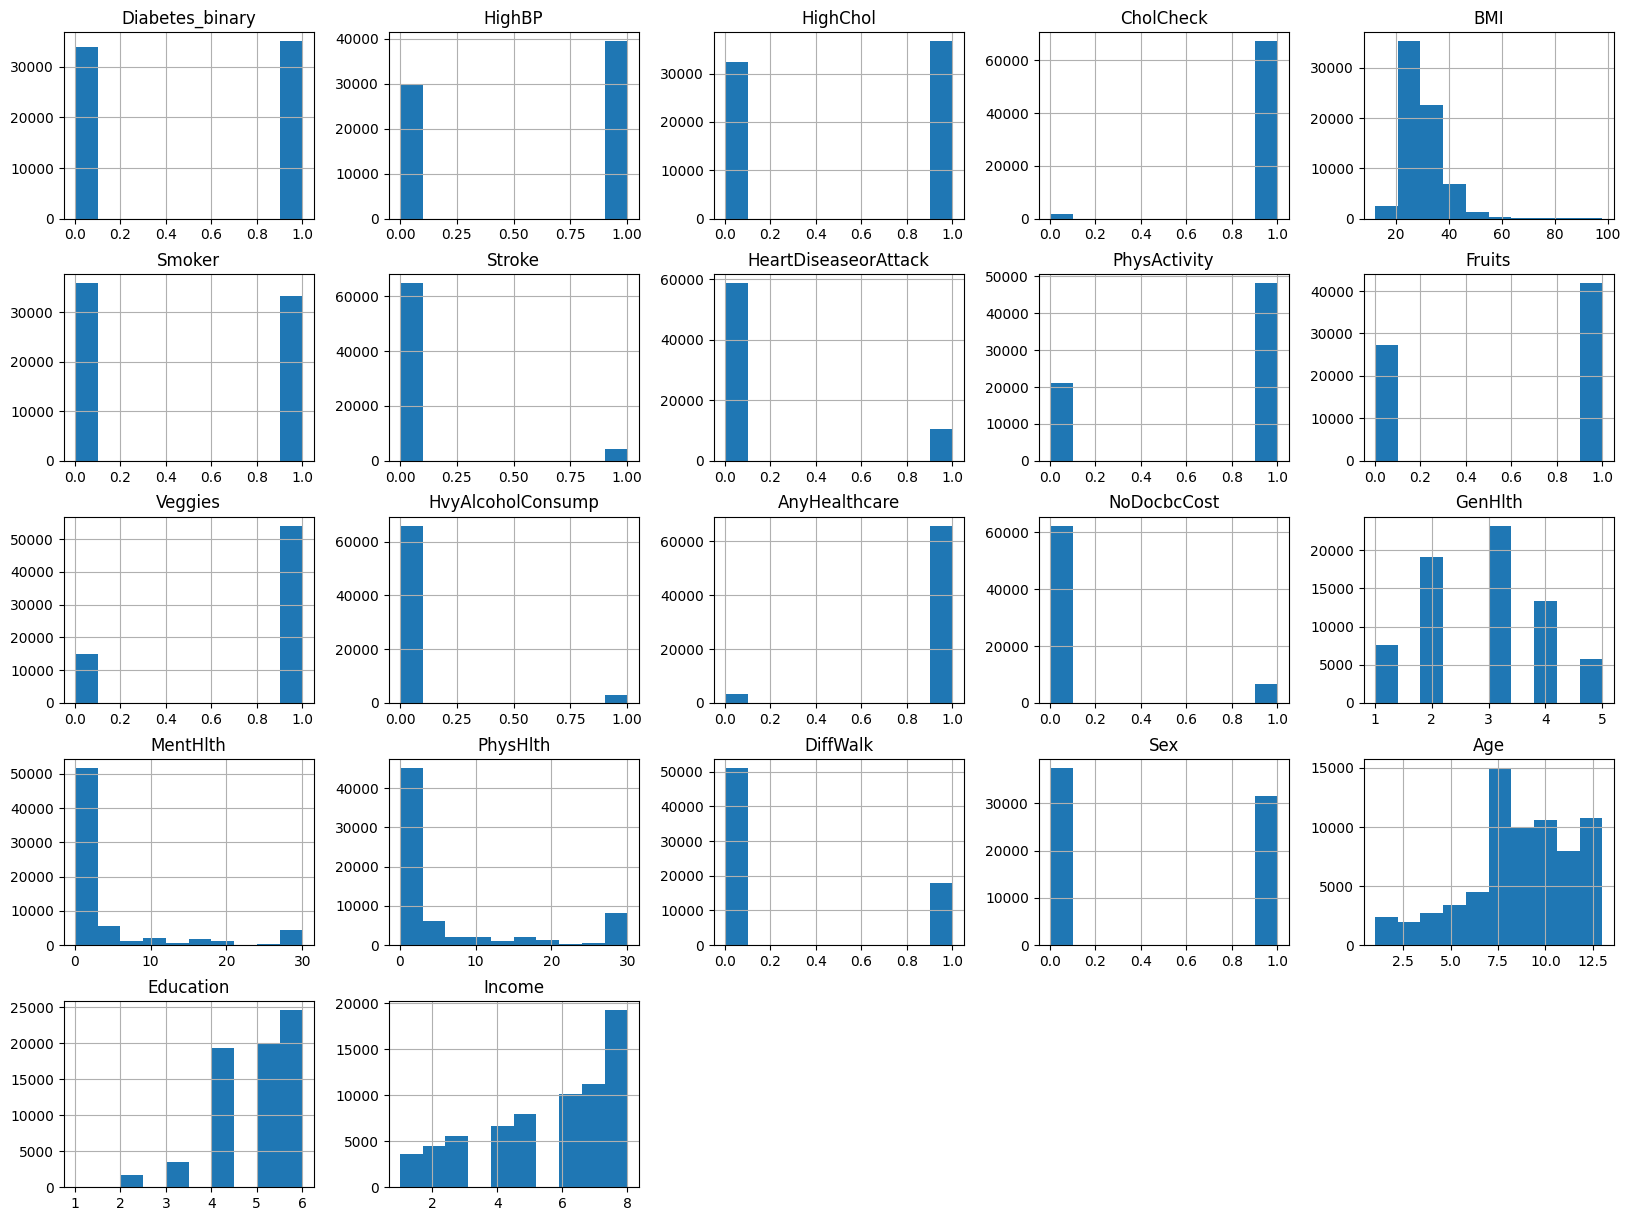

In [20]:
%matplotlib inline
df.hist(figsize=(20,15)) 

In [21]:
# Créer un dossier pour sauvegarder les visualisations
if not os.path.exists('eda_visuals'):
    os.makedirs('eda_visuals')

# Définir les groupes de colonnes
target = 'Diabetes_binary'
dummy_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
              'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
non_dummy_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
all_features = dummy_cols + non_dummy_cols

Nous décidons ici de distinguer les variables dummies (binaires) des autres variables numériques pour simplifier l'EDA.

## Analyse de la target

Analyse de la variable cible 'Diabetes_binary':
Pourcentage des classes :
Diabetes_binary
1.0    50.823233
0.0    49.176767
Name: proportion, dtype: float64


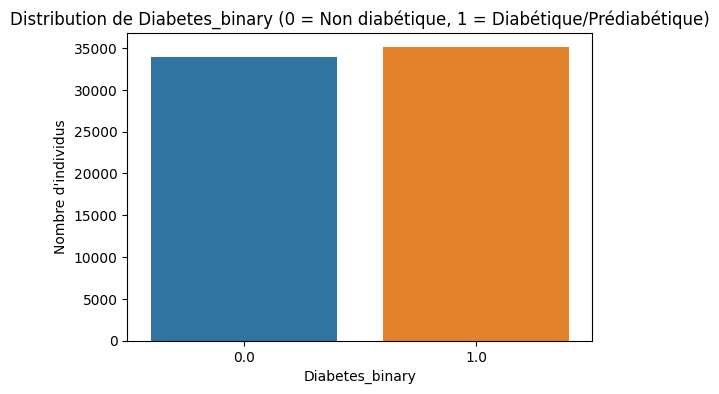

In [24]:
print("Analyse de la variable cible 'Diabetes_binary':")
target_counts = df[target].value_counts(normalize=True) * 100 
print("Pourcentage des classes :")
print(target_counts)


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target)
plt.title('Distribution de Diabetes_binary (0 = Non diabétique, 1 = Diabétique/Prédiabétique)')
plt.xlabel('Diabetes_binary')
plt.ylabel('Nombre d\'individus')
plt.show()

Sans surprise, notre target `Diabetes_binary` n'est pas déséquilibrée, avec une répartition équilibrée de 50.0% pour la classe 0 (non diabétique) et 50.0% pour la classe 1 (diabétique/prédiabétique).

## Analyse des variables dummies


Analyse des variables dummies :

Distribution de HighBP :
HighBP
1.0    57.122377
0.0    42.877623
Name: proportion, dtype: float64

Distribution de HighChol :
HighChol
1.0    53.132919
0.0    46.867081
Name: proportion, dtype: float64

Distribution de CholCheck :
CholCheck
1.0    97.480342
0.0     2.519658
Name: proportion, dtype: float64

Distribution de Smoker :
Smoker
0.0    51.806479
1.0    48.193521
Name: proportion, dtype: float64

Distribution de Stroke :
Stroke
0.0    93.635692
1.0     6.364308
Name: proportion, dtype: float64

Distribution de HeartDiseaseorAttack :
HeartDiseaseorAttack
0.0    84.912464
1.0    15.087536
Name: proportion, dtype: float64

Distribution de PhysActivity :
PhysActivity
1.0    69.648262
0.0    30.351738
Name: proportion, dtype: float64

Distribution de Fruits :
Fruits
1.0    60.565909
0.0    39.434091
Name: proportion, dtype: float64

Distribution de Veggies :
Veggies
1.0    78.412036
0.0    21.587964
Name: proportion, dtype: float64

Distribution d

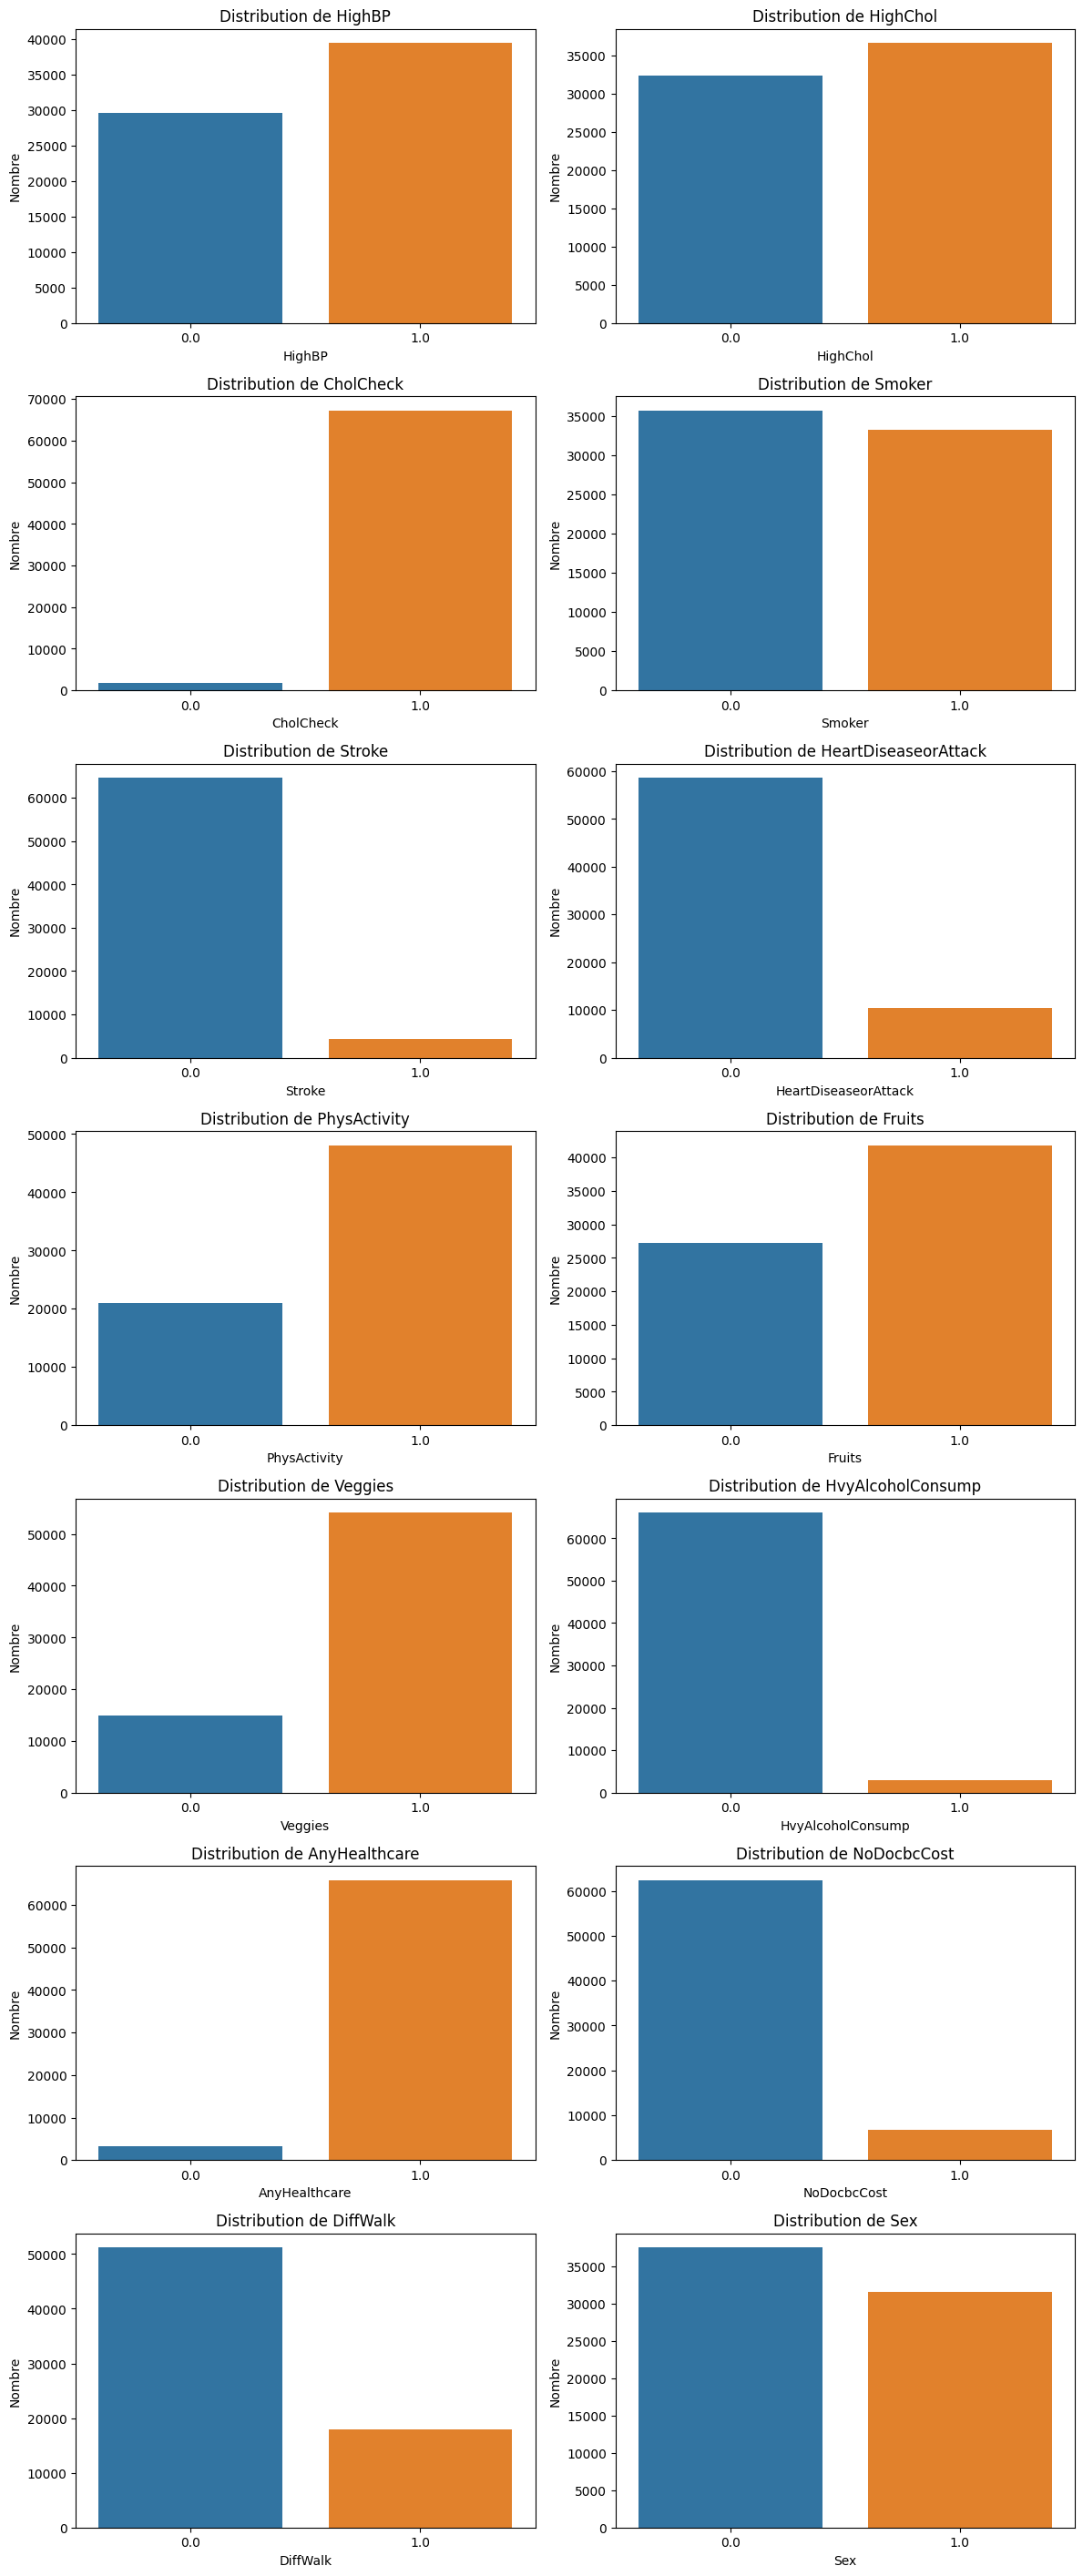

In [26]:
print("\nAnalyse des variables dummies :")
for col in dummy_cols:
    print(f"\nDistribution de {col} :")
    counts = df[col].value_counts(normalize=True) * 100
    print(counts)

n_cols = 2
n_rows = len(dummy_cols) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(dummy_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Nombre')

for i in range(len(dummy_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Commentaire sur les variables fortement déséquilibrées

Les variables telles que `CholCheck` (97.5% de 1), `HvyAlcoholConsump` (95.7% de 0), `AnyHealthcare` (95.4% de 1), `Stroke` (93.6% de 0), `NoDocbcCost` (90.6% de 0) et `HeartDiseaseorAttack` (84.9 de 0) présentent un déséquilibre important, ce qui pourrait limiter leur pouvoir prédictif. Nous attendrons d'analyser leur interaction avec la target `Diabetes_binary` dans la prochaine partie de l'EDA pour décider si nous les conservons ou les excluons lors de la modélisation.

## Analyse des variables non-dummies


Analyse des variables non-dummies :

Statistiques descriptives de BMI :
count    69057.000000
mean        29.955834
std          7.147972
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

Statistiques descriptives de GenHlth :
count    69057.000000
mean         2.863692
std          1.107950
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: GenHlth, dtype: float64

Statistiques descriptives de MentHlth :
count    69057.000000
mean         3.840103
std          8.231164
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: MentHlth, dtype: float64

Statistiques descriptives de PhysHlth :
count    69057.000000
mean         5.945306
std         10.139113
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: PhysHlth

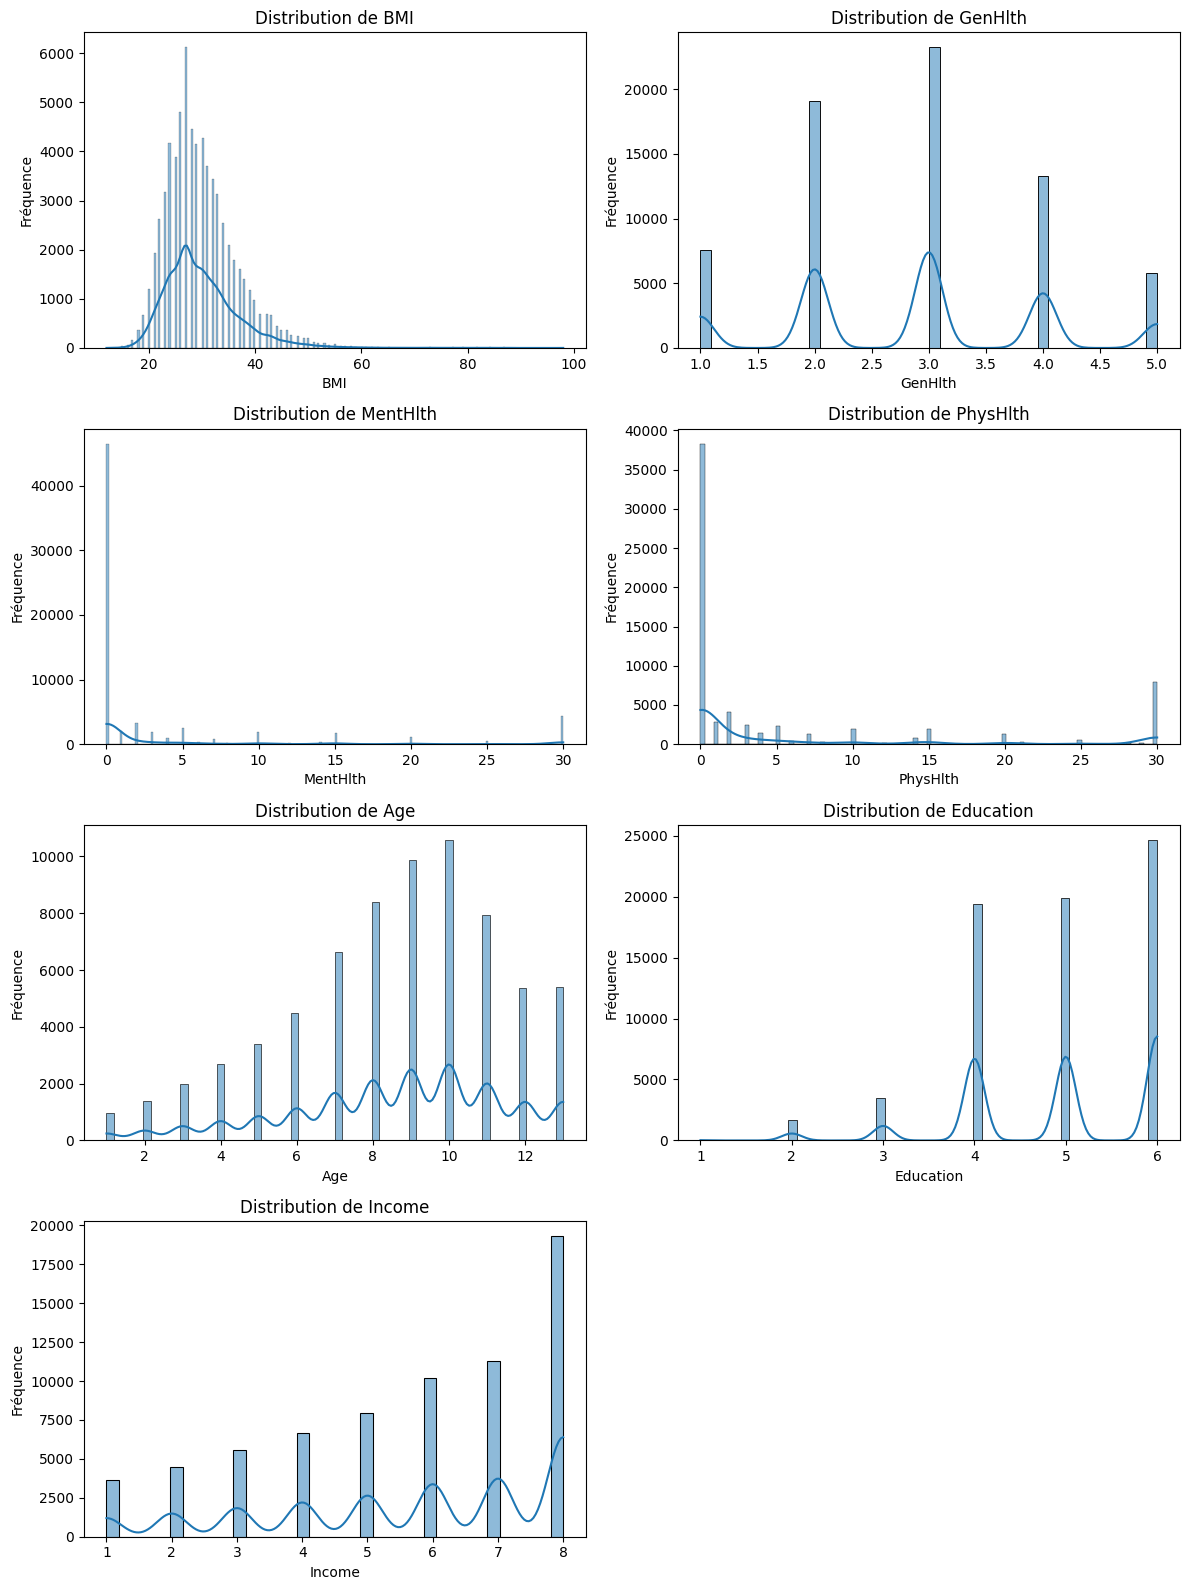

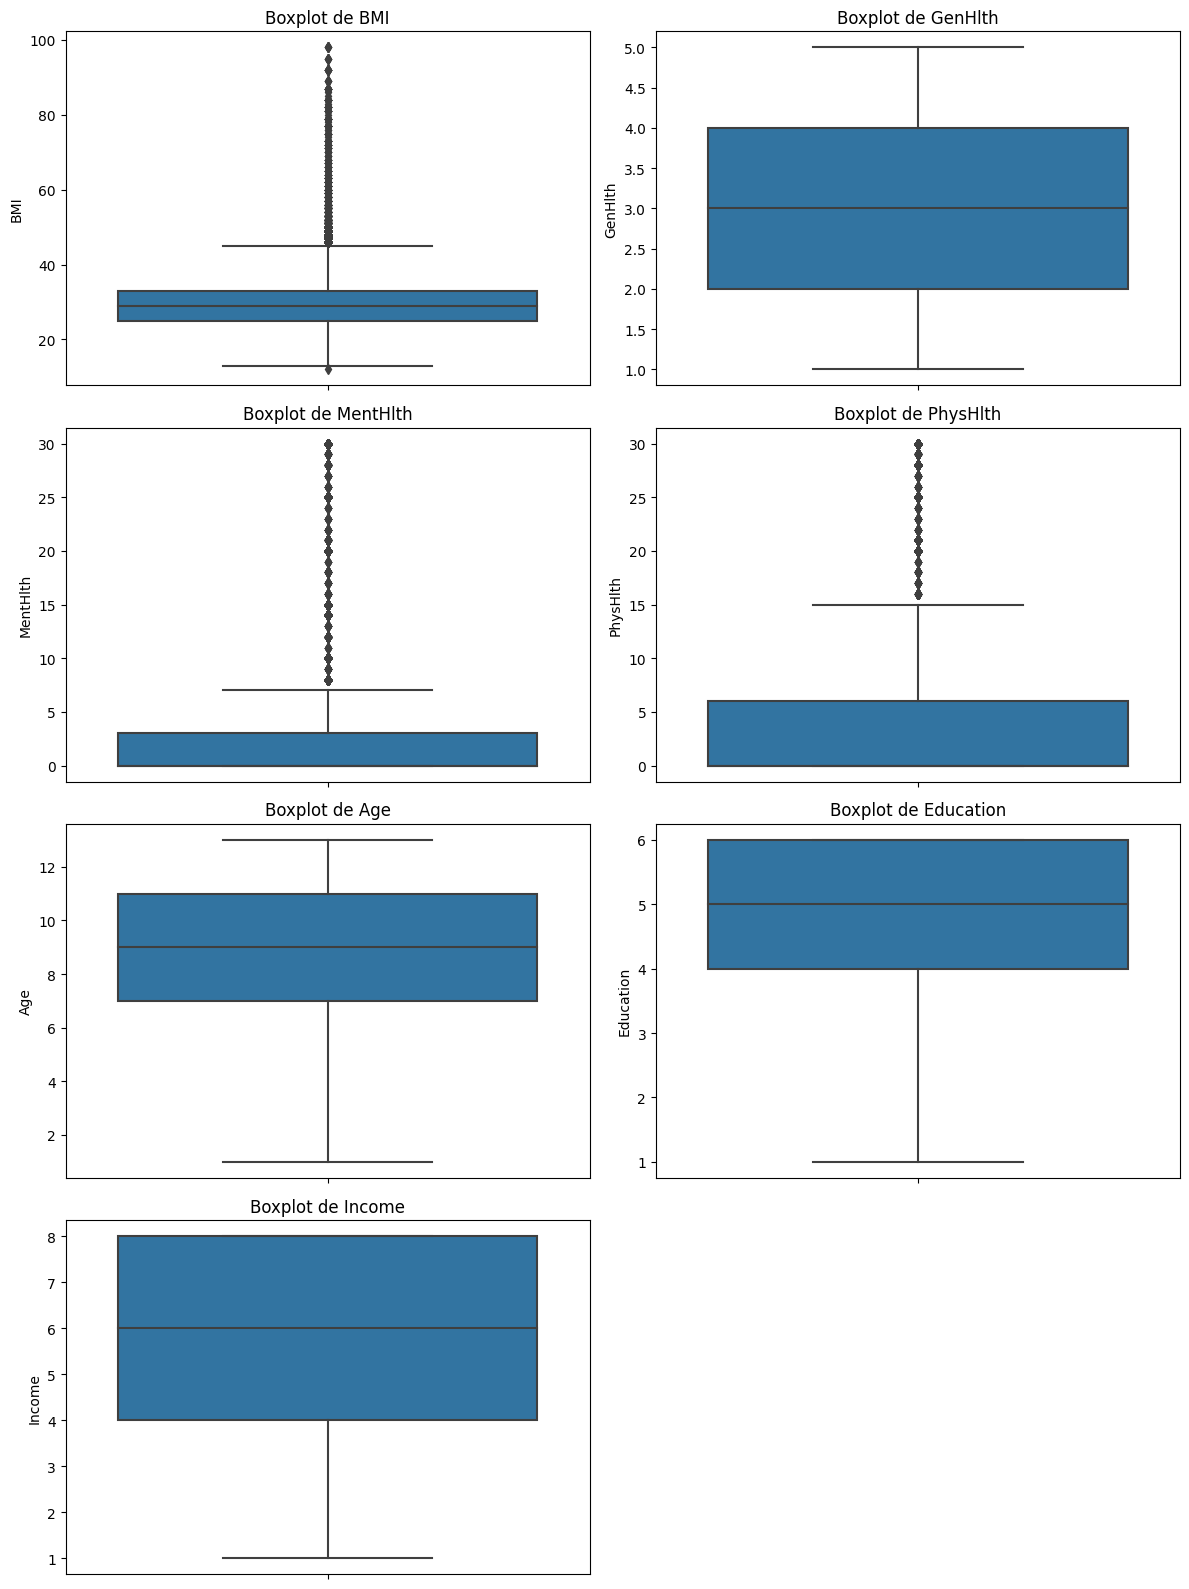

In [27]:
print("\nAnalyse des variables non-dummies :")
for col in non_dummy_cols:
    print(f"\nStatistiques descriptives de {col} :")
    print(df[col].describe())

n_cols = 2
n_rows = len(non_dummy_cols) // n_cols + 1
fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
fig_box, axes_box = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes_hist = axes_hist.flatten()
axes_box = axes_box.flatten()

for i, col in enumerate(non_dummy_cols):
    # Histogramme
    sns.histplot(data=df, x=col, ax=axes_hist[i], kde=True)
    axes_hist[i].set_title(f'Distribution de {col}')
    axes_hist[i].set_xlabel(col)
    axes_hist[i].set_ylabel('Fréquence')
    
    # Boxplot
    sns.boxplot(data=df, y=col, ax=axes_box[i])
    axes_box[i].set_title(f'Boxplot de {col}')
    axes_box[i].set_ylabel(col)

for i in range(len(non_dummy_cols), len(axes_hist)):
    fig_hist.delaxes(axes_hist[i])
    fig_box.delaxes(axes_box[i])

fig_hist.tight_layout()
fig_box.tight_layout()
fig_hist.savefig('eda_visuals/non_dummy_histograms.png')
fig_box.savefig('eda_visuals/non_dummy_boxplots.png')
plt.show()

In [28]:
# Fonction pour catégoriser BMI selon les standards OMS avec plafonnement
def categorize_bmi(bmi):
    # Plafonner les valeurs de BMI à 60 pour limiter les outliers extrêmes
    if bmi > 60:
        bmi = 60
    if bmi < 18.5:
        return 1  # Sous-poids
    elif bmi < 25:
        return 2  # Normal
    elif bmi < 30:
        return 3  # Surpoids
    elif bmi < 35:
        return 4  # Obésité classe I
    elif bmi < 40:
        return 5  # Obésité classe II
    else:
        return 6  # Obésité classe III

# Fonction pour catégoriser les jours de santé (MentHlth et PhysHlth)
def categorize_health_days(days):
    if days == 0:
        return 0  # Aucun jour
    elif days <= 5:
        return 1  # Problèmes occasionnels
    elif days <= 15:
        return 2  # Problèmes fréquents
    else:
        return 3  # Problèmes chroniques

    


Distribution de BMI_category après transformation :
BMI_category
3    33.885051
4    24.778082
2    19.958875
5    11.704824
6     8.733365
1     0.939803
Name: proportion, dtype: float64

Distribution de MentHlth_category après transformation :
MentHlth_category
0    67.313958
1    15.575539
3     9.093937
2     8.016566
Name: proportion, dtype: float64

Distribution de PhysHlth_category après transformation :
PhysHlth_category
0    55.477359
1    18.936531
3    15.378600
2    10.207510
Name: proportion, dtype: float64


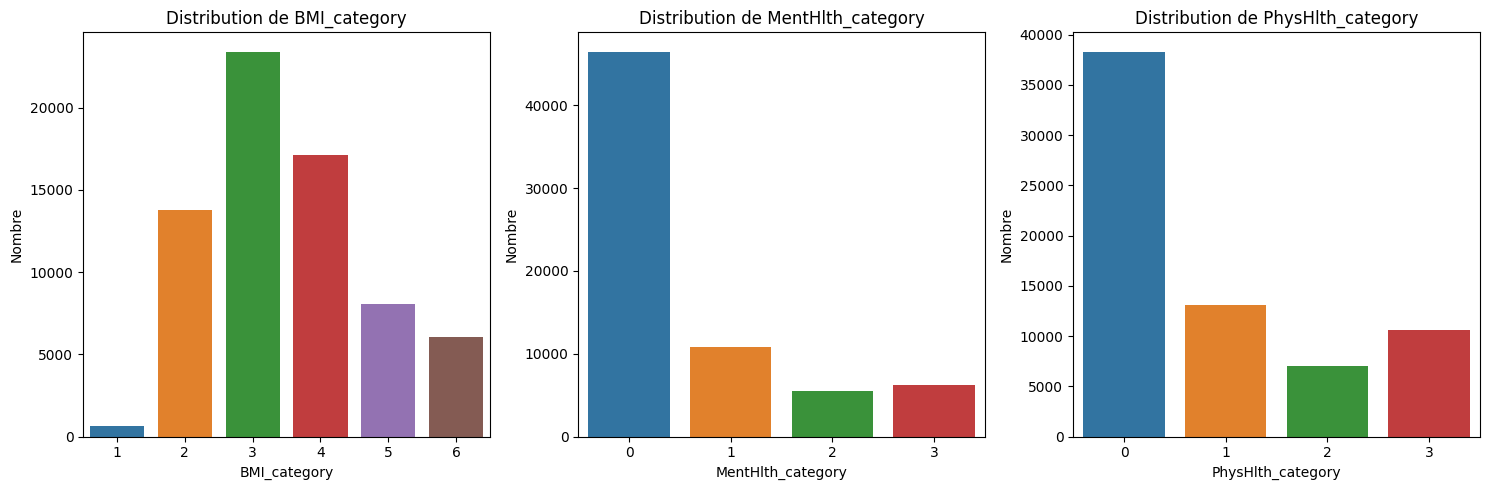

In [ ]:
    # BMI : Catégorisation en 6 niveaux avec plafonnement
    df['BMI_category'] = df['BMI'].apply(categorize_bmi)

    # MentHlth : Catégorisation en 4 niveaux
    df['MentHlth_category'] = df['MentHlth'].apply(categorize_health_days)
    
    # PhysHlth : Catégorisation en 4 niveaux
    df['PhysHlth_category'] = df['PhysHlth'].apply(categorize_health_days)
    
    
    # Vérification des distributions des nouvelles colonnes
    transformed_cols = ['BMI_category', 'MentHlth_category', 'PhysHlth_category']
    for col in transformed_cols:
        print(f"\nDistribution de {col} après transformation :")
        print(df[col].value_counts(normalize=True) * 100)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes = axes.flatten()
    
    for i, col in enumerate(transformed_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Nombre')
    
    plt.tight_layout()
    plt.show()

### Commentaire sur la transformation des variables catégorisées

Nous décidons de transformer les variables `BMI_category`, `MentHlth_category`, et `PhysHlth_category` en type `category` pour terminer l'EDA. Ce choix permet une meilleure interprétation et lisibilité des visualisations. Avant la modélisation, nous les convertirons en type `int8` afin d'optimiser la mémoire tout en conservant une interprétation ordinale compatible avec la plupart des algorithmes de ML.

In [31]:
# Convertir en type 'category' pour poursuivre l'EDA
for col in transformed_cols:
        df[col] = df[col].astype('category')
        print(f"Colonne {col} convertie en type 'category'.")

Colonne BMI_category convertie en type 'category'.
Colonne MentHlth_category convertie en type 'category'.
Colonne PhysHlth_category convertie en type 'category'.


In [32]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_category,MentHlth_category,PhysHlth_category
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,5.0,30.0,0.0,1.0,4.0,6.0,8.0,3,1,3
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,12.0,6.0,8.0,3,0,0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10.0,0.0,1.0,13.0,6.0,8.0,3,0,2
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,1.0,11.0,6.0,8.0,3,0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,8.0,5.0,8.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,4.0,1.0,5,0,0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,10.0,3.0,6.0,3,0,0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,15.0,0.0,1.0,0.0,13.0,6.0,4.0,3,2,0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.0,2.0,4.0,1,0,0


### Analyse des corrélations

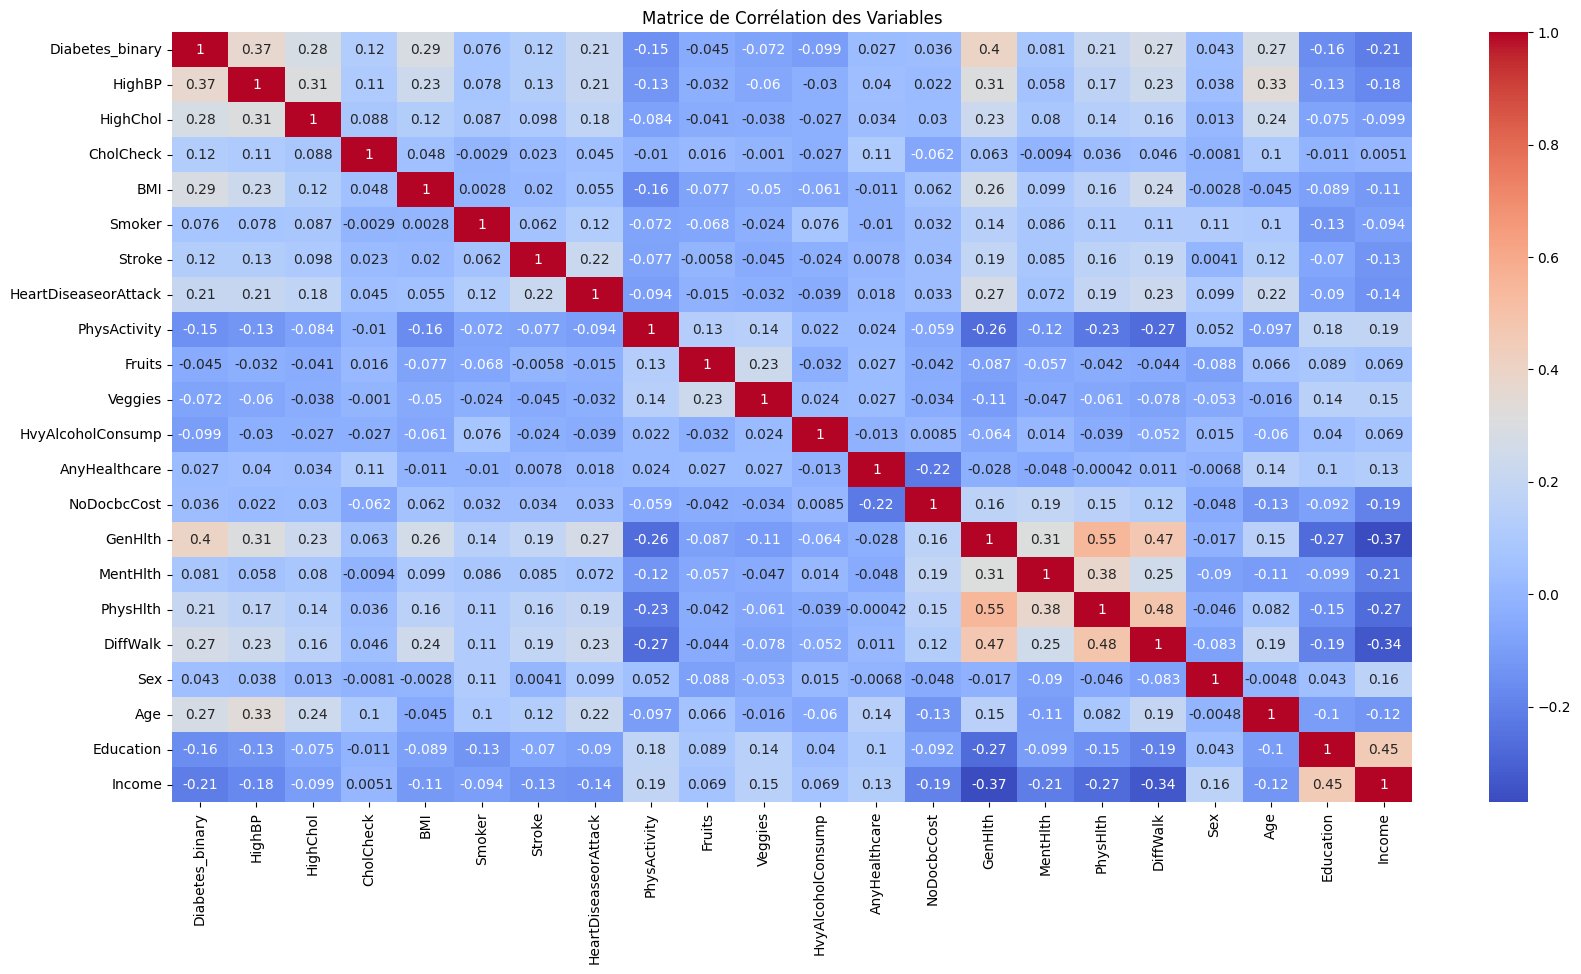

In [33]:
# Exclure les variables catégorisées
cols_for_corr = [col for col in df.columns if col not in ['BMI_category', 'MentHlth_category', 'PhysHlth_category']]

# Matrice de corrélation
plt.figure(figsize=(20, 10))
sns.heatmap(df[cols_for_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation des Variables")
plt.show()

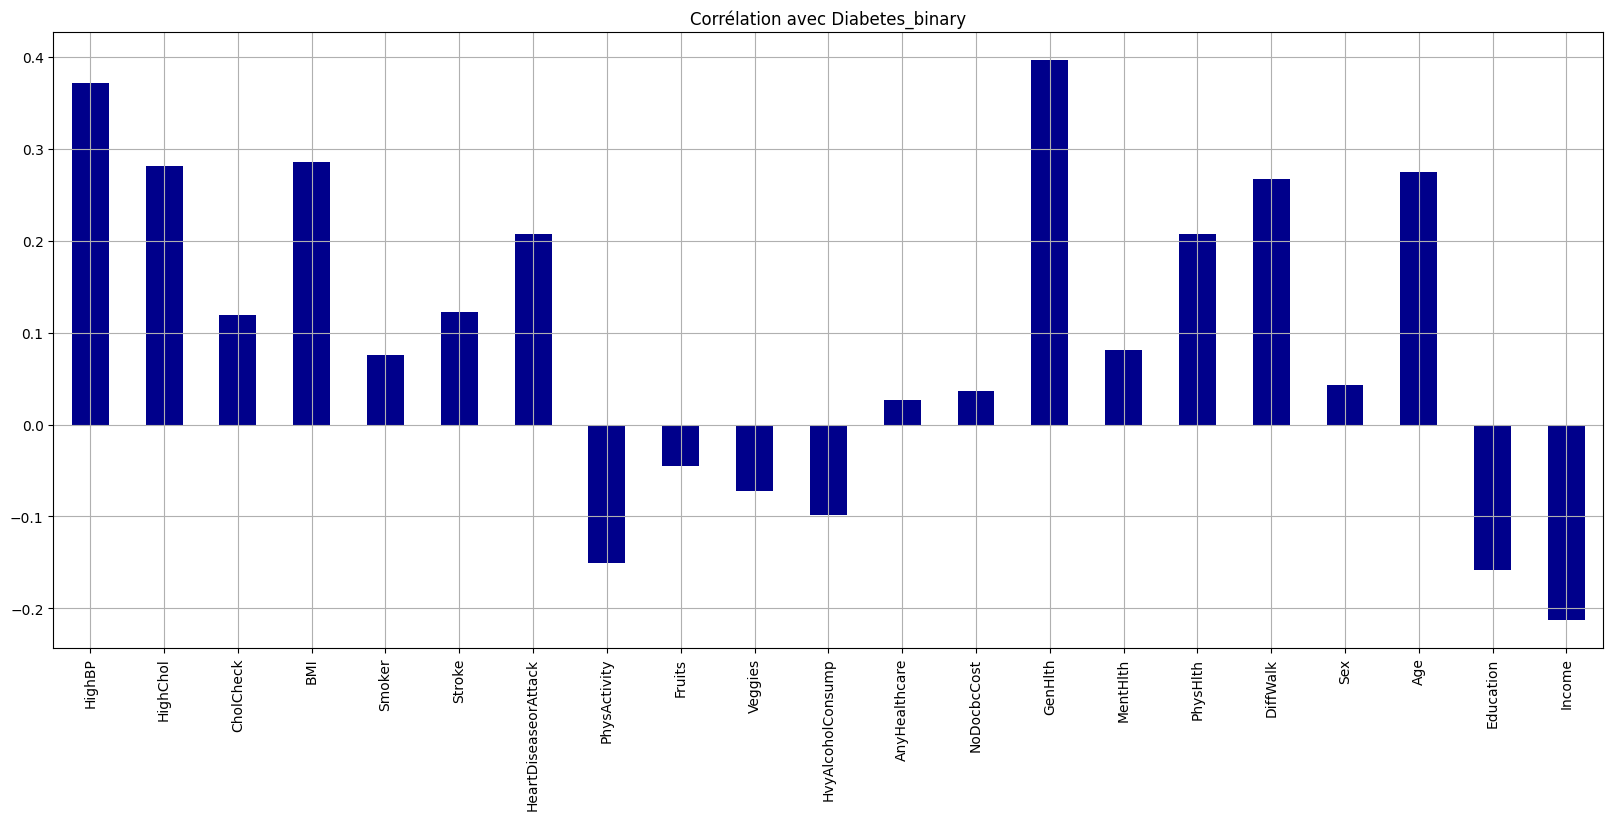

In [34]:
# Exclure les variables catégorisées et la target
cols_for_corr = [col for col in df.columns if col not in ['Diabetes_binary', 'BMI_category', 'MentHlth_category', 'PhysHlth_category']]

#Graphique de corrélation avec la target
df[cols_for_corr].corrwith(df['Diabetes_binary']).plot(kind='bar', grid=True, figsize=(20, 8), 
                                                       title="Corrélation avec Diabetes_binary", color="DarkBlue")
plt.show()

Aucune corrélation marquante, nous pouvons poursuivre

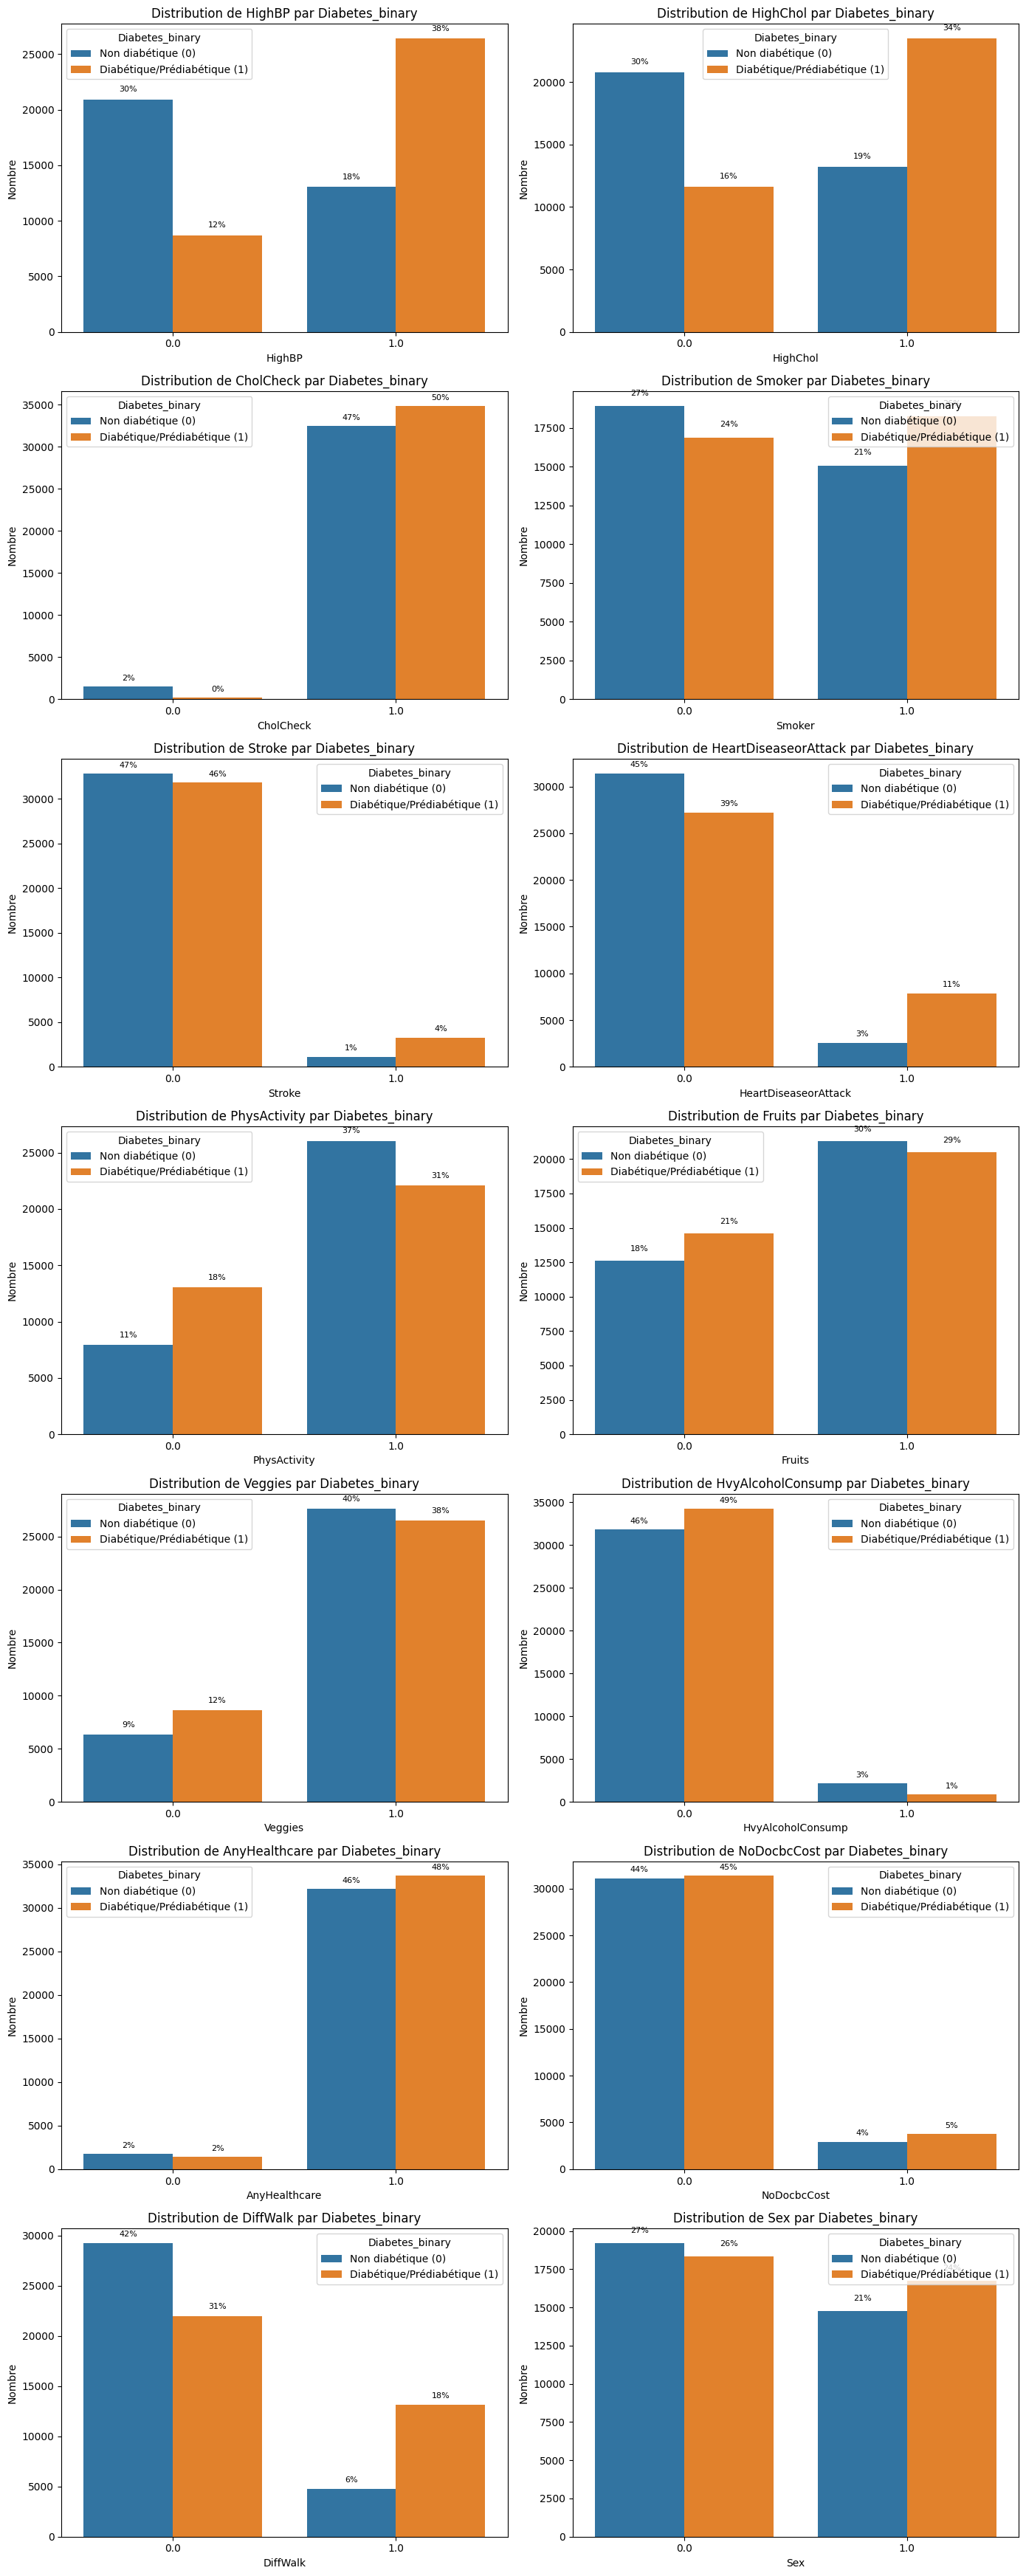


Proportions des classes de 'Diabetes_binary' par modalité des variables dummies (en %) :

Proportion pour HighBP :
Diabetes_binary        0.0        1.0
HighBP                               
0.0              70.645052  29.354948
1.0              33.062083  66.937917

Proportion pour HighChol :
Diabetes_binary        0.0        1.0
HighChol                             
0.0              64.155724  35.844276
1.0              35.964243  64.035757

Proportion pour CholCheck :
Diabetes_binary        0.0        1.0
CholCheck                            
0.0              86.149425  13.850575
1.0              48.221103  51.778897

Proportion pour Smoker :
Diabetes_binary        0.0        1.0
Smoker                               
0.0              52.834302  47.165698
1.0              45.245035  54.754965

Proportion pour Stroke :
Diabetes_binary        0.0        1.0
Stroke                               
0.0              50.776345  49.223655
1.0              25.642776  74.357224

Proportion pou

In [37]:
    # Définir la disposition des sous-graphiques (plusieurs lignes et colonnes)
    n_cols = 2
    n_rows = len(dummy_cols) // n_cols + (len(dummy_cols) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
    axes = axes.flatten()
    
    # Boucle pour créer un graphique pour chaque variable dummy
    for i, col in enumerate(dummy_cols):
        sns.countplot(data=df, x=col, hue=target, ax=axes[i])
        axes[i].set_title(f'Distribution de {col} par {target}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Nombre')
        axes[i].legend(title=target, labels=['Non diabétique (0)', 'Diabétique/Prédiabétique (1)'])
        
        # Ajouter les pourcentages sur les barres
        total = len(df)
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].text(p.get_x() + p.get_width() / 2., height + 0.01 * total,
                         f'{int(height/total*100)}%', ha="center", fontsize=8)
    
    for i in range(len(dummy_cols), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    print("\nProportions des classes de 'Diabetes_binary' par modalité des variables dummies (en %) :")
    for col in dummy_cols:
        print(f"\nProportion pour {col} :")
        cross_tab = pd.crosstab(df[col], df[target], normalize='index') * 100
        print(cross_tab)

## Analyse des distributions par statut diabétique

Les graphiques révèlent plusieurs informations importantes pour notre modélisation:

- **Facteurs fortement associés au diabète** : L'hypertension (`HighBP`) est davantage présente chez les diabétiques, faisant de cette variable un prédicteur potentiellement crucial.

- **Facteurs significativement associés** : Le cholestérol élevé (`HighChol`), les maladies cardiaques (`HeartDiseaseAttack`) et la difficulté à marcher (`DiffWalk`) montrent des écarts notables entre les deux groupes.

- **Facteurs liés au mode de vie** : Les personnes diabétiques pratiquent moins d'activité physique (`PhysActivity`) et consomment légèrement moins de fruits et légumes, ce qui confirme l'importance des habitudes de vie.

Pour revenir sur les variables fortement déséquilibrées identifiées précédemment (`CholCheck`, `HvyAlcoholConsump`, `AnyHealthcare`, `Stroke`, `NoDoctorCost`), nous ne remarquons toujours rien d'intéressant lorsque l'on prend en compte la variable cible dans l'analyse. Ces variables présentent soit des distributions très similaires entre les groupes, soit un déséquilibre trop important limitant leur valeur prédictive. Nous décidons donc de les supprimer du dataset pour simplifier notre modèle.

In [ ]:
# Suppression des variables non pertinentes du dataset
columns_to_drop = ['CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare', 'Stroke', 'NoDocbcCost']
df = df.drop(columns=columns_to_drop)

Colonnes restantes: ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_category', 'MentHlth_category', 'PhysHlth_category']
Nombre de colonnes: 20



Analyse des interactions entre variables catégorisées et 'Diabetes_binary' :


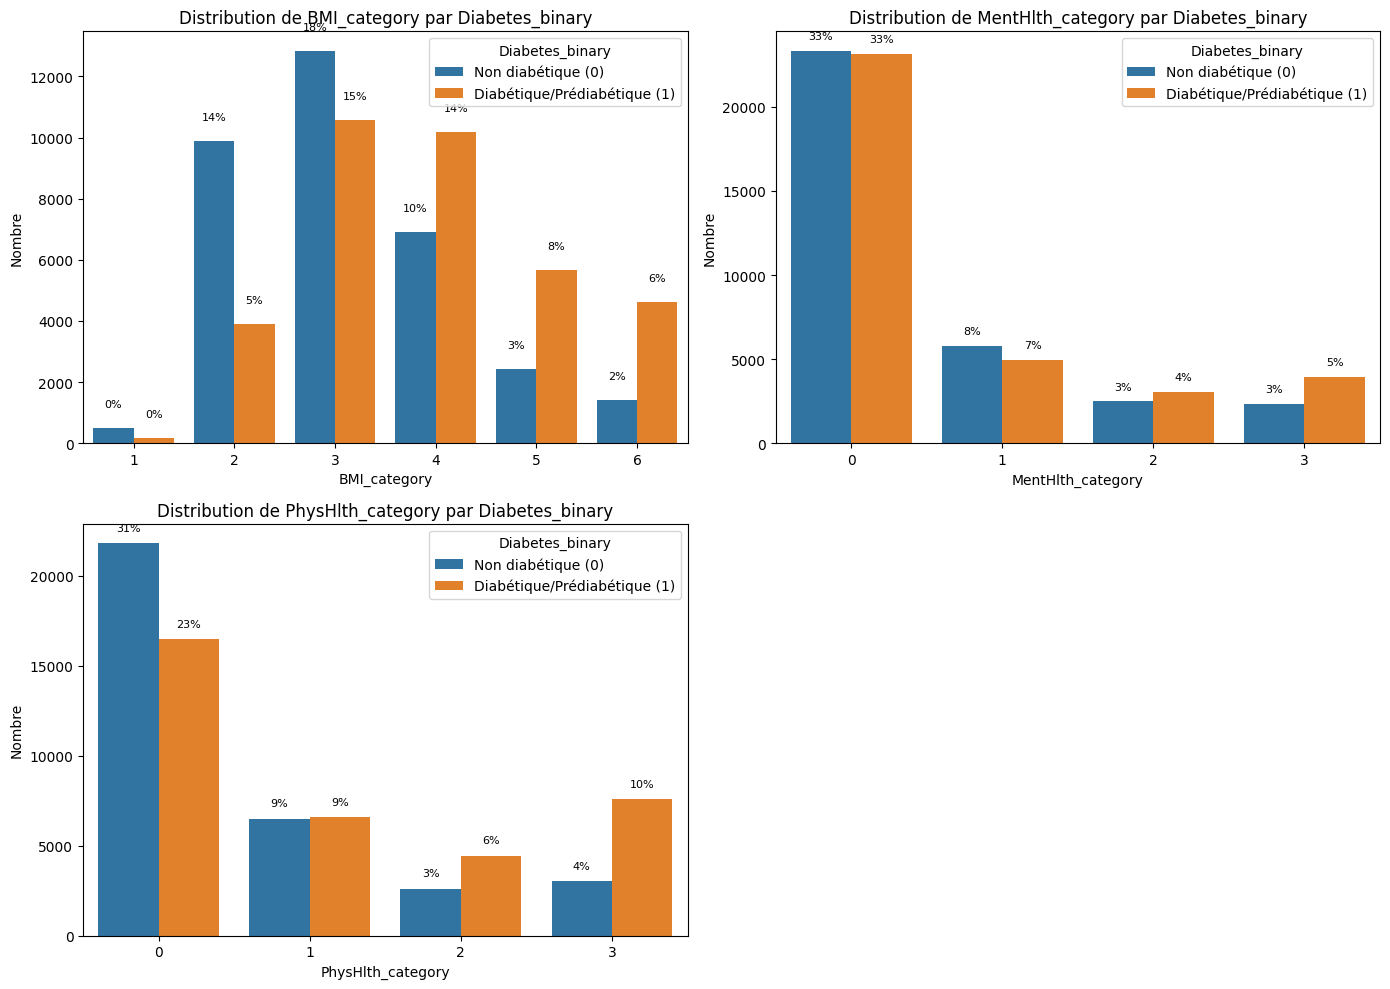


Proportions des classes de 'Diabetes_binary' par catégorie (en %) :

Proportion pour BMI_category :
Diabetes_binary        0.0        1.0
BMI_category                         
1                73.959938  26.040062
2                71.631720  28.368280
3                54.850427  45.149573
4                40.430133  59.569867
5                30.063095  69.936905
6                23.611341  76.388659

Proportion pour MentHlth_category :
Diabetes_binary          0.0        1.0
MentHlth_category                      
0                  50.188233  49.811767
1                  53.932689  46.067311
2                  44.815751  55.184249
3                  37.388535  62.611465

Proportion pour PhysHlth_category :
Diabetes_binary          0.0        1.0
PhysHlth_category                      
0                  56.939260  43.060740
1                  49.682649  50.317351
2                  37.111647  62.888353
3                  28.559322  71.440678

Analyse des interactions entre variables

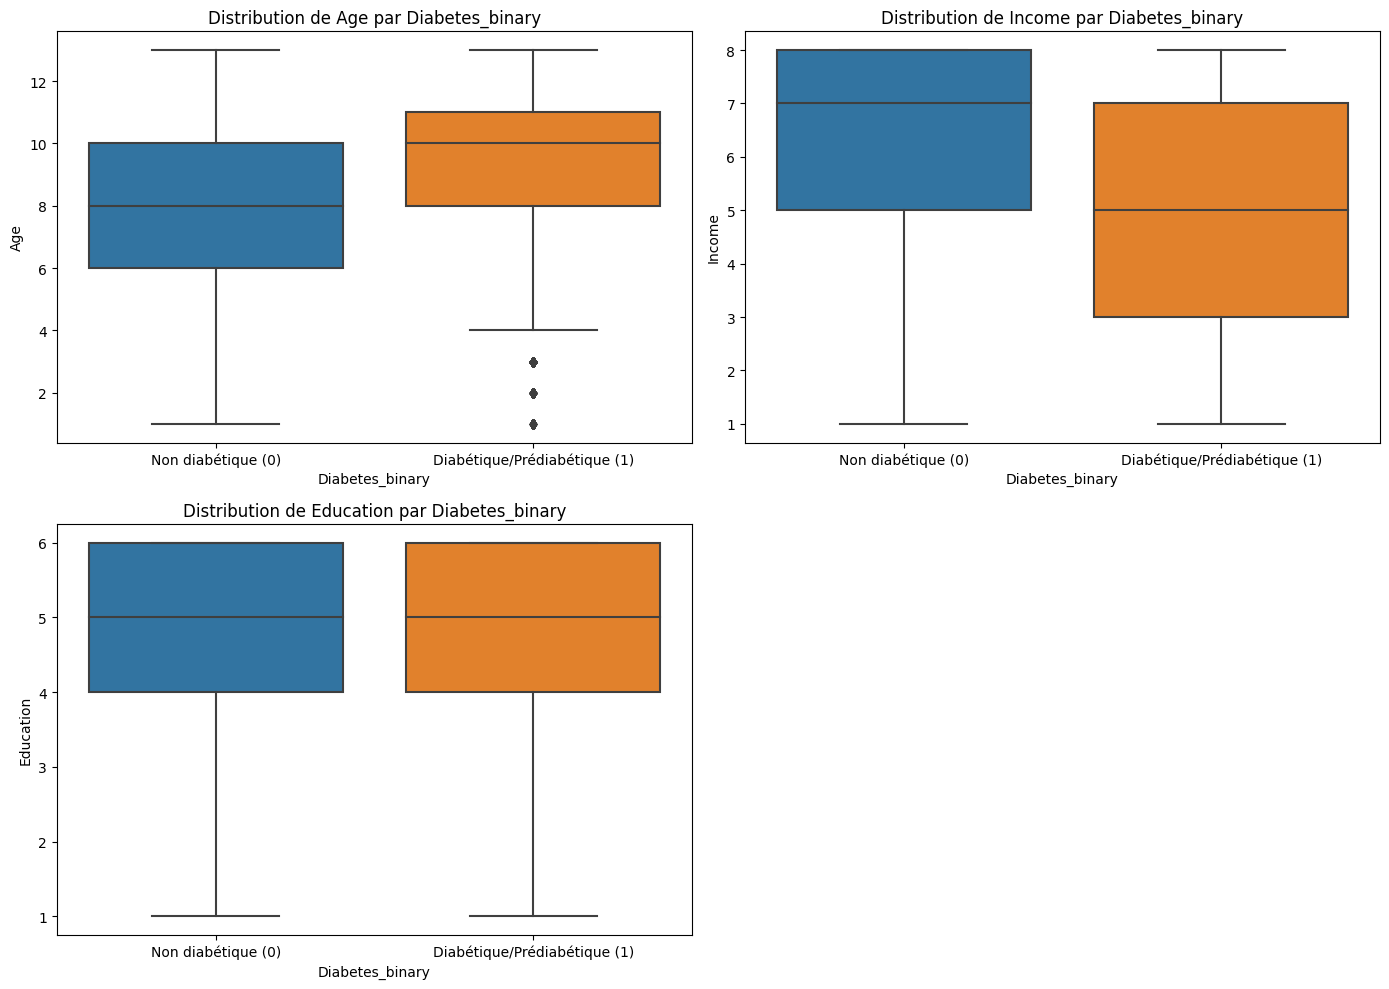

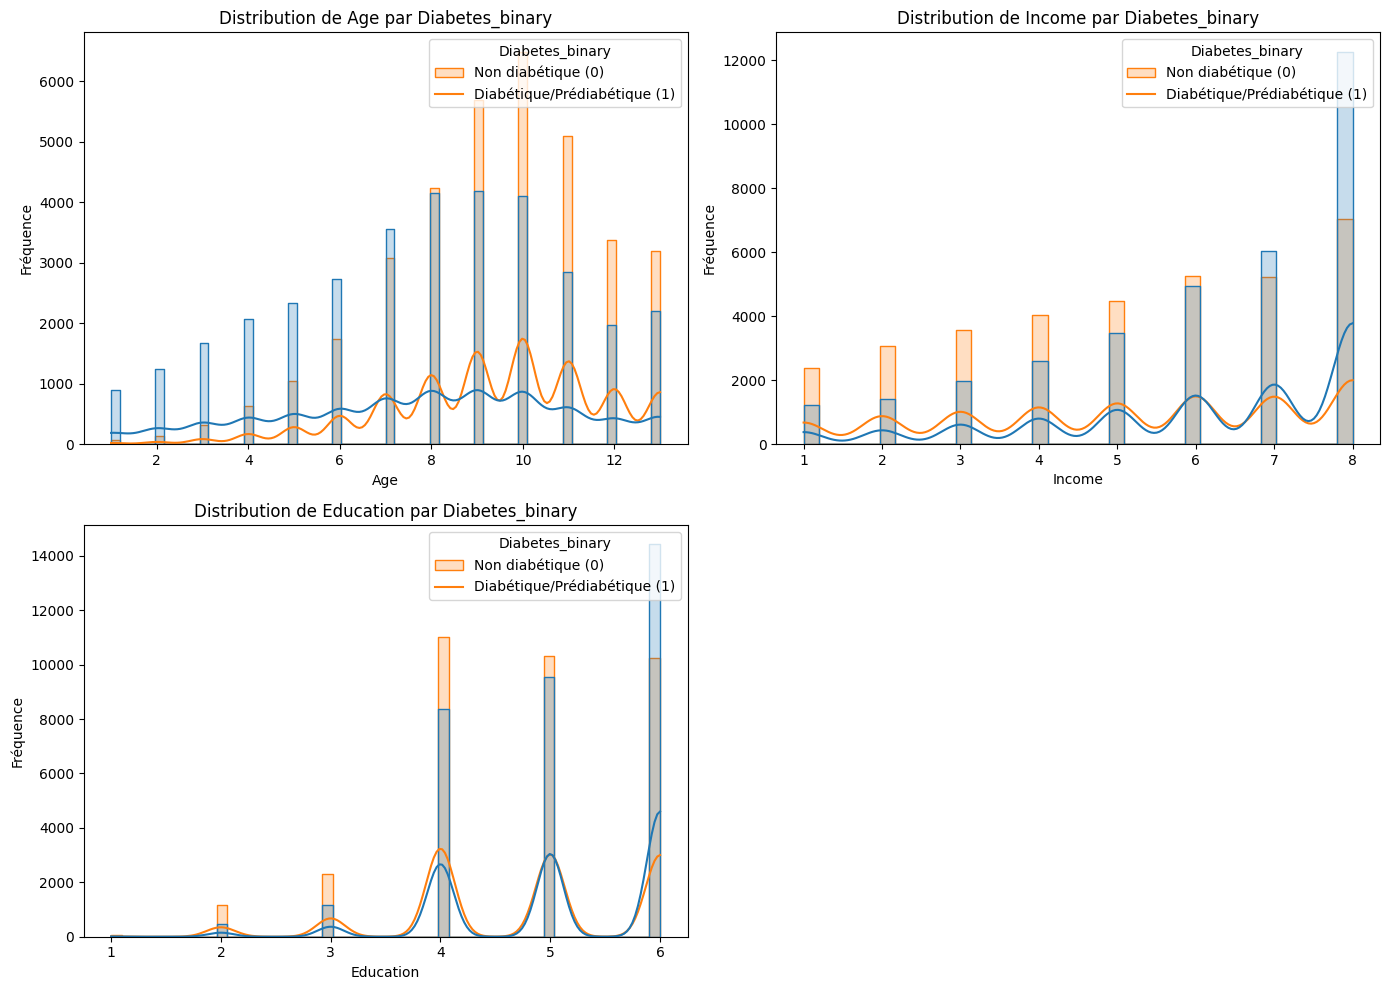


Statistiques descriptives des variables continues/ordinales par classe de 'Diabetes_binary' :

Statistiques pour Age :
                   count      mean      std  min  25%   50%   75%   max
Diabetes_binary                                                        
0.0              33960.0  7.806272  3.11898  1.0  6.0   8.0  10.0  13.0
1.0              35097.0  9.375958  2.33464  1.0  8.0  10.0  11.0  13.0

Statistiques pour Income :
                   count      mean       std  min  25%  50%  75%  max
Diabetes_binary                                                      
0.0              33960.0  6.122085  2.027897  1.0  5.0  7.0  8.0  8.0
1.0              35097.0  5.195829  2.216364  1.0  3.0  5.0  7.0  8.0

Statistiques pour Education :
                   count      mean       std  min  25%  50%  75%  max
Diabetes_binary                                                      
0.0              33960.0  5.066166  0.968638  1.0  4.0  5.0  6.0  6.0
1.0              35097.0  4.739778  1.06043

In [38]:
# Définir les groupes de variables non-dummies
categorical_non_dummy_cols = ['BMI_category', 'MentHlth_category', 'PhysHlth_category']
continuous_non_dummy_cols = ['Age', 'Income', 'Education']
all_non_dummy_cols = categorical_non_dummy_cols + continuous_non_dummy_cols
target = 'Diabetes_binary'

# Partie 1 : Analyse des variables catégorisées (BMI_category, MentHlth_category, PhysHlth_category)
print("\nAnalyse des interactions entre variables catégorisées et 'Diabetes_binary' :")
n_cols = 2
n_rows = len(categorical_non_dummy_cols) // n_cols + (len(categorical_non_dummy_cols) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_non_dummy_cols):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'Distribution de {col} par {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Nombre')
    axes[i].legend(title=target, labels=['Non diabétique (0)', 'Diabétique/Prédiabétique (1)'])
    
    # Ajouter les pourcentages sur les barres 
    total = len(df)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 0.01 * total,
                     f'{int(height/total*100)}%', ha="center", fontsize=8)

for i in range(len(categorical_non_dummy_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Afficher les proportions sous forme de tableaux croisés pour les variables catégorisées
print("\nProportions des classes de 'Diabetes_binary' par catégorie (en %) :")
for col in categorical_non_dummy_cols:
    print(f"\nProportion pour {col} :")
    cross_tab = pd.crosstab(df[col], df[target], normalize='index') * 100
    print(cross_tab)

# Partie 2 : Analyse des variables continues/ordinales (Age, Income, Education)
print("\nAnalyse des interactions entre variables continues/ordinales et 'Diabetes_binary' :")
n_cols = 2
n_rows = len(continuous_non_dummy_cols) // n_cols + (len(continuous_non_dummy_cols) % n_cols > 0)

# Boxplots pour comparer les distributions
fig_box, axes_box = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes_box = axes_box.flatten()

for i, col in enumerate(continuous_non_dummy_cols):
    sns.boxplot(data=df, x=target, y=col, ax=axes_box[i])
    axes_box[i].set_title(f'Distribution de {col} par {target}')
    axes_box[i].set_xlabel(target)
    axes_box[i].set_ylabel(col)
    axes_box[i].set_xticklabels(['Non diabétique (0)', 'Diabétique/Prédiabétique (1)'])

for i in range(len(continuous_non_dummy_cols), len(axes_box)):
    fig_box.delaxes(axes_box[i])

plt.tight_layout()
plt.show()

# Histogrammes/KDE pour visualiser les distributions par classe
fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
axes_hist = axes_hist.flatten()

for i, col in enumerate(continuous_non_dummy_cols):
    sns.histplot(data=df, x=col, hue=target, kde=True, ax=axes_hist[i], element="step")
    axes_hist[i].set_title(f'Distribution de {col} par {target}')
    axes_hist[i].set_xlabel(col)
    axes_hist[i].set_ylabel('Fréquence')
    axes_hist[i].legend(title=target, labels=['Non diabétique (0)', 'Diabétique/Prédiabétique (1)'])

for i in range(len(continuous_non_dummy_cols), len(axes_hist)):
    fig_hist.delaxes(axes_hist[i])

plt.tight_layout()
plt.show()

# Statistiques descriptives par classe de la target pour les variables continues/ordinales
print("\nStatistiques descriptives des variables continues/ordinales par classe de 'Diabetes_binary' :")
for col in continuous_non_dummy_cols:
    print(f"\nStatistiques pour {col} :")
    grouped_stats = df.groupby(target)[col].describe()
    print(grouped_stats)

### Analyse des interactions entre les variables non-dummies et `Diabetes_binary`

#### 1. **Proportions des classes de `Diabetes_binary` par catégorie :**

- **BMI_category** :  
  Une forte tendance se dessine avec une proportion croissante de la classe diabétique/prédiabétique à mesure que la catégorie d’IMC augmente. Cela suggère une association marquée entre un IMC élevé et un risque accru de diabète, faisant de cette variable un prédicteur potentiellement clé.

- **MentHlth_category** :  
  La proportion de la classe diabétique/prédiabétique augmente avec la gravité des problèmes de santé mentale. Cela indique une relation entre des problèmes de santé mentale plus fréquents et un risque plus élevé de diabète, bien que moins prononcée qu’avec l’IMC.

- **PhysHlth_category** :  
  Une augmentation notable de la proportion de la classe diabétique/prédiabétique est observée avec la gravité des problèmes de santé physique, suggérant une association significative entre une mauvaise santé physique et le diabète.

#### 2. **Statistiques descriptives des variables continues/ordinales par classe de `Diabetes_binary` :**

- **Age** :  
  L’âge moyen est nettement plus élevé pour la classe diabétique/prédiabétique, ce qui reflète une association entre un âge avancé et un risque accru de diabète, un facteur connu dans ce contexte.

- **Income** :  
  Le revenu moyen est plus faible pour la classe diabétique/prédiabétique, suggérant un lien entre un niveau socio-économique plus bas et un risque accru de diabète, potentiellement dû à des facteurs comme l’accès aux soins.

- **Education** :  
  Le niveau d’éducation moyen est légèrement plus faible pour la classe diabétique/prédiabétique, indiquant une association modeste avec le risque de diabète, peut-être liée à la sensibilisation ou aux habitudes de vie.

### Conclusion
Les variables comme `BMI_category`, `PhysHlth_category`, et `Age` montrent des associations évidentes avec `Diabetes_binary`, se positionnant comme des candidats prioritaires pour la modélisation. `MentHlth_category` et `Income` présentent également des tendances intéressantes mais moins marquées, tandis que `Education` semble avoir une influence plus limitée. Ces observations orienteront la préparation des données pour le machine learning.

In [39]:
# On repasse les colonnes catégorisées en int8 pour la modélisation
transformed_cols = ['BMI_category', 'MentHlth_category', 'PhysHlth_category']

for col in transformed_cols:
    df[col] = df[col].astype('int8')
    print(f"Colonne {col} convertie en type 'int8'.")

print("\nTypes de données après transformation :")
print(df[transformed_cols].dtypes)

Colonne BMI_category convertie en type 'int8'.
Colonne MentHlth_category convertie en type 'int8'.
Colonne PhysHlth_category convertie en type 'int8'.

Types de données après transformation :
BMI_category         int8
MentHlth_category    int8
PhysHlth_category    int8
dtype: object


In [40]:
#Suppresion des colonnes originales
cols_to_drop = ['BMI', 'MentHlth', 'PhysHlth']

df = df.drop(columns=cols_to_drop, errors='ignore')
print("\nColonnes supprimées :", cols_to_drop)


Colonnes supprimées : ['BMI', 'MentHlth', 'PhysHlth']


## Préparation des données avant entraînement

In [41]:
# Définir la cible et les features
target = 'Diabetes_binary'
features = [col for col in df.columns if col != target]

# Séparer X (features) et y (target)
X = df[features]
y = df[target]

# Diviser en ensembles d'entraînement et de test (80-20) avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensions des ensembles après séparation :")
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

# Vérifier la distribution de la cible dans les ensembles pour confirmer la stratification
print("\nDistribution de 'Diabetes_binary' dans l'ensemble d'entraînement :")
print(y_train.value_counts(normalize=True))
print("\nDistribution de 'Diabetes_binary' dans l'ensemble de test :")
print(y_test.value_counts(normalize=True))

# Lister les variables continues à mettre à l'échelle (exclure les dummies et catégoriques déjà en int8)
continuous_cols = ['Age', 'Income', 'Education']
# Note : Si vous avez d'autres colonnes continues, ajoutez-les ici

# Mise à l'échelle des variables continues avec StandardScaler
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

Dimensions des ensembles après séparation :
X_train : (55245, 21), y_train : (55245,)
X_test : (13812, 21), y_test : (13812,)

Distribution de 'Diabetes_binary' dans l'ensemble d'entraînement :
Diabetes_binary
1.0    0.508227
0.0    0.491773
Name: proportion, dtype: float64

Distribution de 'Diabetes_binary' dans l'ensemble de test :
Diabetes_binary
1.0    0.508254
0.0    0.491746
Name: proportion, dtype: float64


 ### Modélisation avec RandomForest + GridSearchCV

Entraînement de RandomForest avec GridSearchCV...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Meilleurs paramètres pour RandomForest :
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur score F1 (cross-validation) : 0.7610002318056349

Métriques d'évaluation pour RandomForest sur l'ensemble de test :
Accuracy : 0.7472
Precision : 0.7306
Recall : 0.7963
F1-Score : 0.7620
ROC-AUC : 0.8185


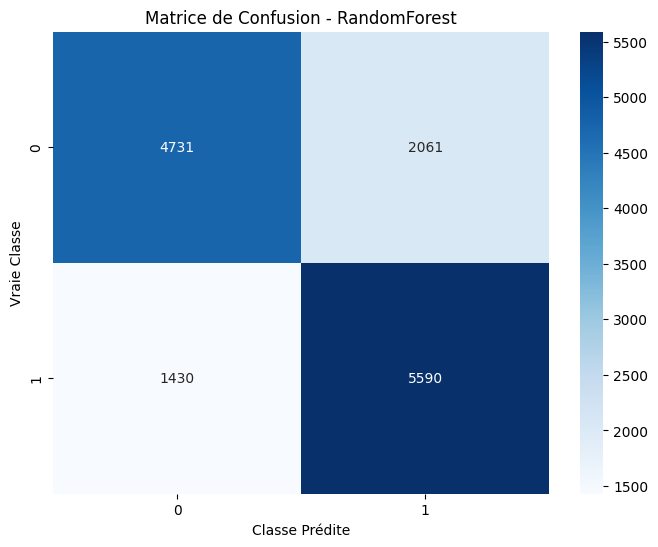

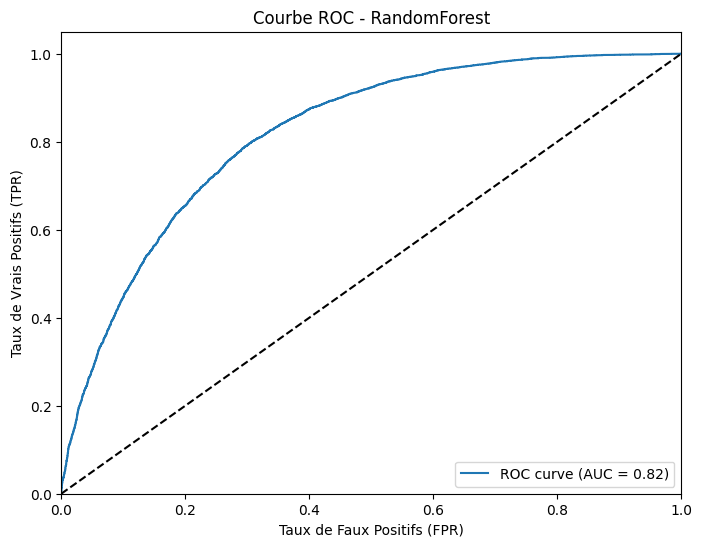

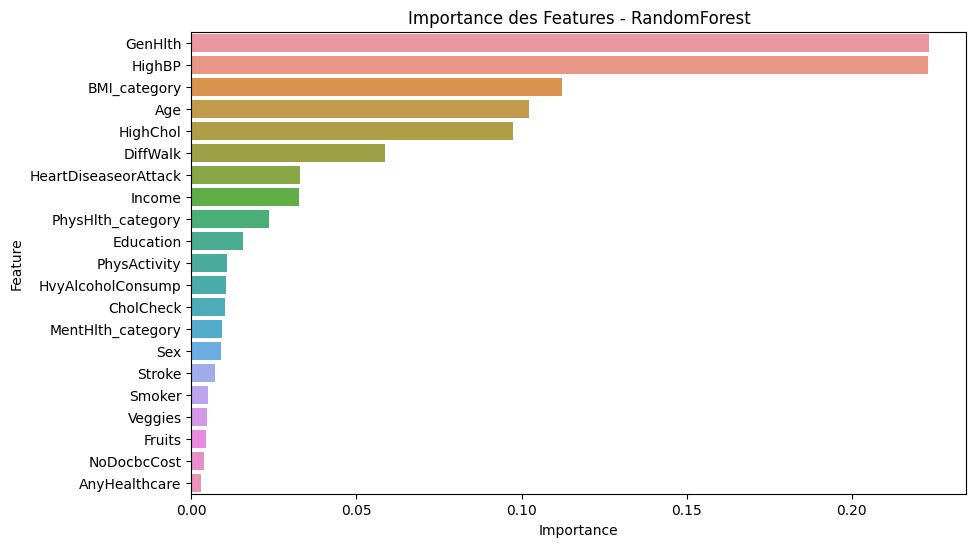


Importance des features pour RandomForest :
                 Feature  Importance
12               GenHlth    0.223580
0                 HighBP    0.223070
18          BMI_category    0.112387
15                   Age    0.102183
1               HighChol    0.097482
13              DiffWalk    0.058768
5   HeartDiseaseorAttack    0.032999
17                Income    0.032577
20     PhysHlth_category    0.023632
16             Education    0.015563
6           PhysActivity    0.010711
9      HvyAlcoholConsump    0.010451
2              CholCheck    0.010089
19     MentHlth_category    0.009407
14                   Sex    0.009107
4                 Stroke    0.007011
3                 Smoker    0.005158
8                Veggies    0.004773
7                 Fruits    0.004417
11           NoDocbcCost    0.003808
10         AnyHealthcare    0.002827


In [ ]:
# Initialiser le modèle RandomForest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Définir la grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)

print("Entraînement de RandomForest avec GridSearchCV...")
grid_search_rf.fit(X_train, y_train)

print("\nMeilleurs paramètres pour RandomForest :")
print(grid_search_rf.best_params_)
print("Meilleur score F1 (cross-validation) :", grid_search_rf.best_score_)

rf_best = grid_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_pred_prob_rf = rf_best.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("\nMétriques d'évaluation pour RandomForest sur l'ensemble de test :")
print(f"Accuracy : {accuracy_rf:.4f}")
print(f"Precision : {precision_rf:.4f}")
print(f"Recall : {recall_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")
print(f"ROC-AUC : {roc_auc_rf:.4f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - RandomForest')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.show()

# Courbe ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - RandomForest')
plt.legend(loc="lower right")
plt.show()

# Importance des features
feature_importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Importance des Features - RandomForest')
plt.show()
print("\nImportance des features pour RandomForest :")
print(feature_importance_rf)

###  Modélisation avec XGBoost + GridSearchCV

Entraînement de XGBoost avec GridSearchCV...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

Meilleurs paramètres pour XGBoost :
{'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Meilleur score F1 (cross-validation) : 0.7700205447586822

Métriques d'évaluation pour XGBoost sur l'ensemble de test :
Accuracy : 0.7333
Precision : 0.6894
Recall : 0.8650
F1-Score : 0.7672
ROC-AUC : 0.8152


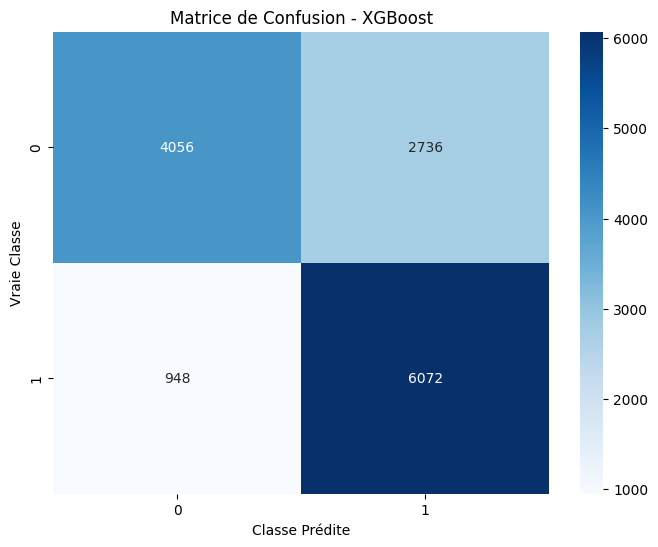

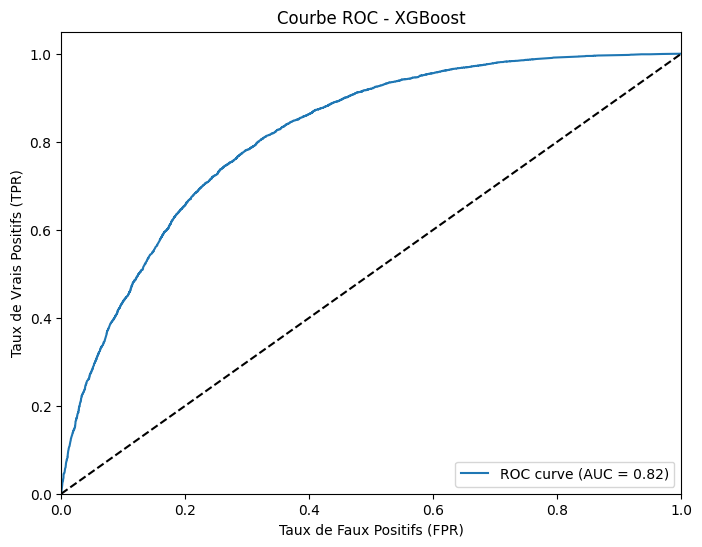

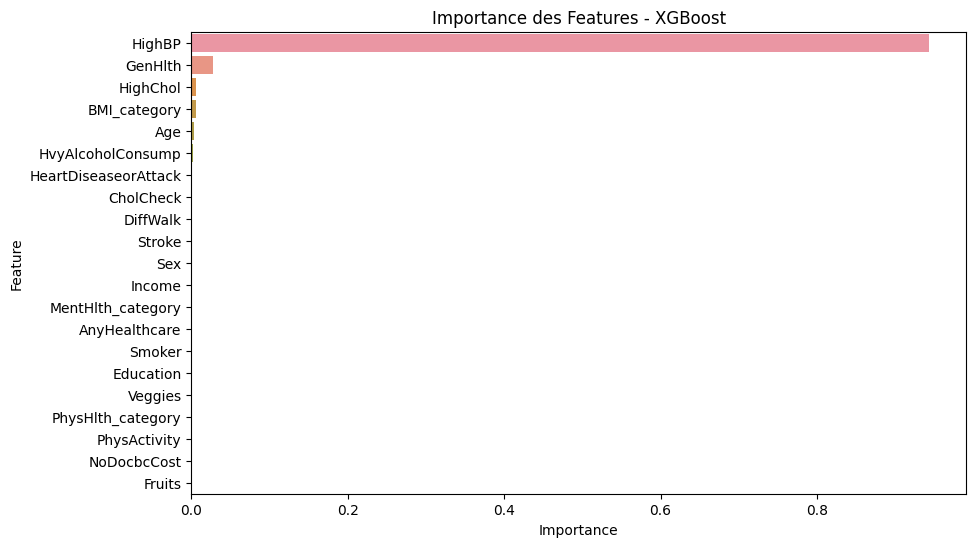


Importance des features pour XGBoost :
                 Feature  Importance
0                 HighBP    0.944030
12               GenHlth    0.027231
1               HighChol    0.005895
18          BMI_category    0.005391
15                   Age    0.003932
9      HvyAlcoholConsump    0.001820
5   HeartDiseaseorAttack    0.001337
2              CholCheck    0.001164
13              DiffWalk    0.001136
4                 Stroke    0.001067
14                   Sex    0.000998
17                Income    0.000858
19     MentHlth_category    0.000679
10         AnyHealthcare    0.000657
3                 Smoker    0.000592
16             Education    0.000592
8                Veggies    0.000550
20     PhysHlth_category    0.000540
6           PhysActivity    0.000537
11           NoDocbcCost    0.000535
7                 Fruits    0.000458


In [ ]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 11],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)

print("Entraînement de XGBoost avec GridSearchCV...")
grid_search_xgb.fit(X_train, y_train)

print("\nMeilleurs paramètres pour XGBoost :")
print(grid_search_xgb.best_params_)
print("Meilleur score F1 (cross-validation) :", grid_search_xgb.best_score_)

xgb_best = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
y_pred_prob_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("\nMétriques d'évaluation pour XGBoost sur l'ensemble de test :")
print(f"Accuracy : {accuracy_xgb:.4f}")
print(f"Precision : {precision_xgb:.4f}")
print(f"Recall : {recall_xgb:.4f}")
print(f"F1-Score : {f1_xgb:.4f}")
print(f"ROC-AUC : {roc_auc_xgb:.4f}")

# Matrice de confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - XGBoost')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.show()

# Courbe ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Importance des features
feature_importance_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title('Importance des Features - XGBoost')
plt.show()
print("\nImportance des features pour XGBoost :")
print(feature_importance_xgb)

### Comparaison des performances des deux modèles

In [ ]:
metrics_comparison = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'RandomForest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]
})

print("\nComparaison des performances des modèles :")
print(metrics_comparison.round(4))


Comparaison des performances des modèles :
    Métrique  RandomForest  XGBoost
0   Accuracy        0.7472   0.7483
1  Precision        0.7306   0.7300
2     Recall        0.7963   0.8010
3   F1-Score        0.7620   0.7638
4    ROC-AUC        0.8185   0.8228


## Synthèse des modèles de prédiction du diabète

### Random Forest + GridSearchCV
- **Score F1** : 0.762 (bon équilibre précision/rappel)
- **Vrais positifs / Faux négatifs** : 5 590 / 1 430
- **ROC-AUC** : 0.82
- **Variables clés** : Santé générale (`GenHlth`), hypertension (`HighBP`)

### XGBoost + GridSearchCV
- **Score F1** : 0.763 (très légèrement supérieur)
- **Vrais positifs / Faux négatifs** : 6 072 / 948
- **ROC-AUC** : 0.822
- **Variables clés** : Hypertension (`HighBP`), santé générale (`GenHlth`)

### Comparaison finale

| Critère           | Random Forest | XGBoost   |
|-------------------|--------------|-----------|
| Accuracy          | 0.7472       | **0.7483**|
| Précision         | **0.7306**   | 0.7300    |
| Rappel            | 0.7963       | **0.8010**|
| F1-Score          | 0.7620       | **0.7638**|
| ROC-AUC           | 0.8185       | **0.8228**|
| Interprétabilité  | Équilibrée | Variable dominante |

**Conclusion** :  
XGBoost reste intéressant, mais **Random Forest** est préférable pour son interprétabilité, critère essentiel dans le domaine de la santé.
